In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv('4.2-economic_index.csv')

In [96]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [97]:
### Drop unnecessary column
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [98]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [99]:
### Check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

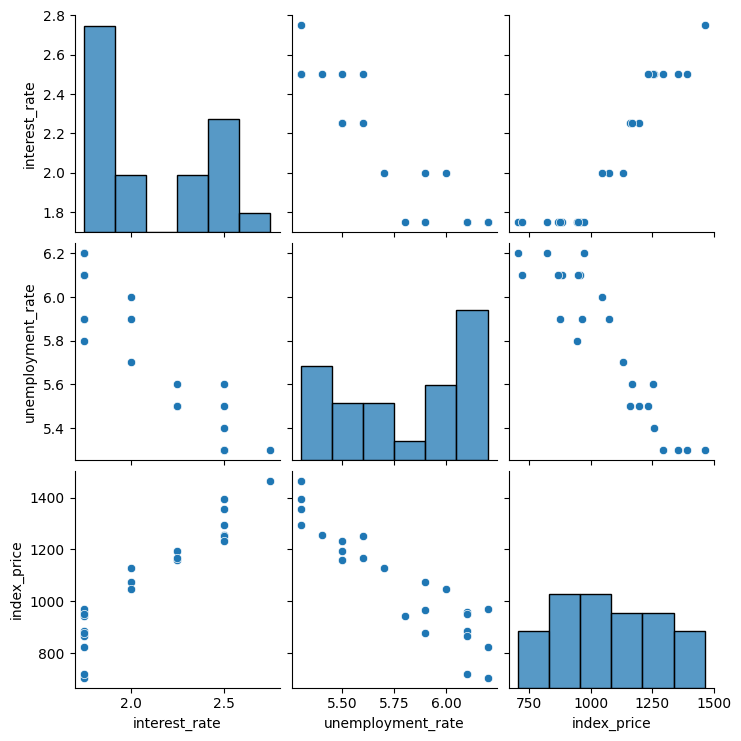

In [100]:
### Lets do some visualization
sns.pairplot(df)

In [101]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

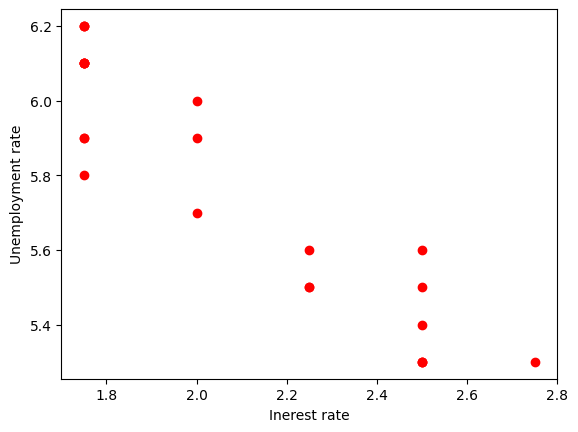

In [102]:
### Visualize the data points more closely
plt.scatter(df['interest_rate'], df['unemployment_rate'], c='r')
plt.xlabel('Inerest rate')
plt.ylabel('Unemployment rate')

In [103]:
### Independent and dependent feature

# x = df[['index_price', 'unemployment_rate']]    
# Another way

x = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [104]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [105]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [ ]:
### Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)

In [107]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18, 2), (6, 2), (18,), (6,))

<Axes: xlabel='interest_rate', ylabel='index_price'>

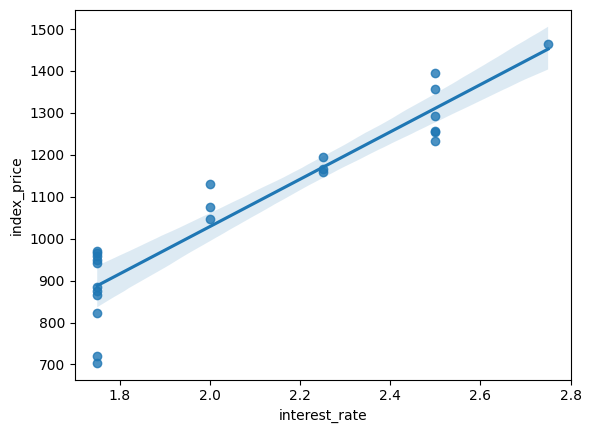

In [108]:
### To plot a data in a linear regression model fit we can use regression plot of seaborn
### But we cannot do this for more than two features. i.e. we cannot basically create a 3D plot.
sns.regplot(x=df['interest_rate'], y=df['index_price'], data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

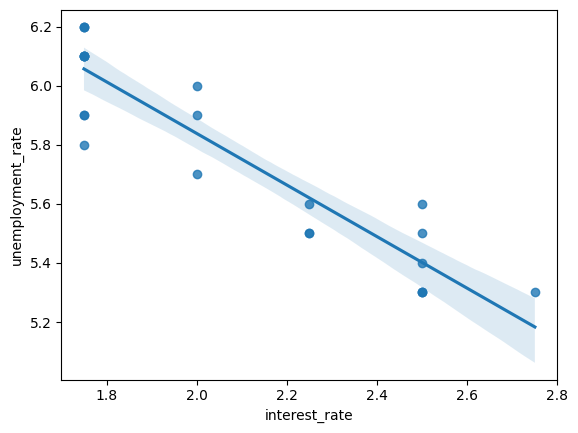

In [109]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'], data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

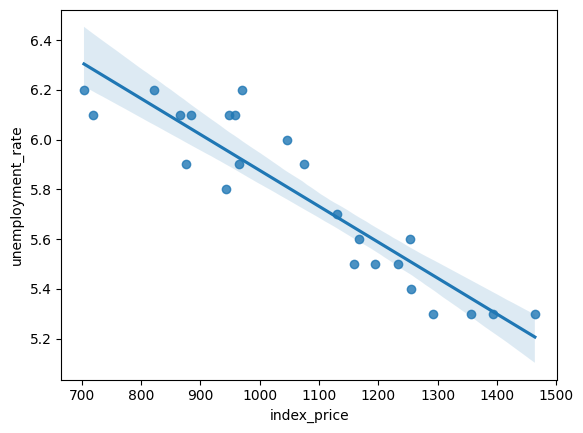

In [110]:
sns.regplot(x=df['index_price'], y=df['unemployment_rate'], data=df)

In [111]:
### Standardization
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()

In [113]:
x_train = scaler.fit_transform(x_train) ## it converts this into a two dimensional array
x_test = scaler.fit_transform(x_test)

In [114]:
x_train, x_test

(array([[-0.9701425 ,  0.12088746],
        [ 0.48507125, -0.81167297],
        [ 1.21267813, -0.81167297],
        [ 0.48507125, -0.81167297],
        [-0.9701425 ,  1.05344789],
        [-0.9701425 ,  0.43174094],
        [-0.9701425 ,  1.05344789],
        [ 1.21267813, -1.12252644],
        [ 0.48507125, -0.50081949],
        [-0.24253563,  0.43174094],
        [-0.9701425 ,  1.36430137],
        [-0.24253563,  0.74259442],
        [ 1.21267813, -1.43337992],
        [ 1.940285  , -1.43337992],
        [-0.9701425 ,  1.05344789],
        [ 1.21267813, -1.43337992],
        [-0.9701425 ,  1.05344789],
        [-0.9701425 ,  1.05344789]]),
 array([[ 1.36438208, -1.59658123],
        [-0.86824314,  1.18456027],
        [-0.86824314,  1.18456027],
        [ 1.36438208, -0.66953406],
        [-0.86824314,  0.2575131 ],
        [-0.12403473, -0.36051834]]))

In [115]:
### Model training
from sklearn.linear_model import  LinearRegression

In [116]:
regression = LinearRegression()

In [117]:
regression.fit(x_train, y_train)

LinearRegression()

In [118]:
print("Coefficient or Slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient or Slope: [ 105.39997107 -101.4293638 ]
Intercept: 1074.2222222222224


In [119]:
### Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [120]:
validation_score

array([-1801.88276018, -5336.55515872, -8595.66570572])

In [121]:
np.mean(validation_score)

np.float64(-5244.701208207528)

In [122]:
### Prediction
y_pred = regression.predict(x_test)

In [123]:
y_pred

array([1379.96827227,  862.56022599,  862.56022599, 1285.93846813,
        956.59003012, 1097.71611084])

In [124]:
### Performance metrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [125]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  4920.810850302377
Mean Absolute Error:  63.46344328071609
Root Mean Squared Error:  70.14849143283394


In [126]:
### R Square
from sklearn.metrics import r2_score

In [127]:
score = r2_score(y_test, y_pred)
score

0.8487558990071669

In [128]:
n = len(y_test)
k = x_test.shape[1]

adusted_score = 1 - (1-score)*(n - 1)/(n-k-1)
adusted_score

0.747926498345278